<a id="TOP"></a>
# Workflow Demo

TBA
    
---
    
- Step 0: [Import Packages](#import_packages)
- Step 1: [Define the class to fill particle information in to NumpyArray](#define_class) 
- Step 2: [Define Functions](#define_function) 
- Step 3: [Define Function for `Event_List`](#event_list)  
- Step 4: [Import ROOT File](#import_file)
- Step 5: [logging.info the Branch in the Delphes](#delphes_tree)  
- Step 6: [Loading Event](#loading_event)
- Step 7: [Let's do Jet Clustering!!](#jet_clustering)
- Step 8: [Quick Check Jet Images](#jet_images)
- Step 9: [Quick Check Kinematics of Higgs candidates](#kinematics)




- Step 10: [Print Jets in the Nth event](#jets_in_nth_event)
- Step 11: [Print the Truth Record in an Event](#truth_record)

---

[![arXiv](https://img.shields.io/badge/arXiv-1807.10768%20-green.svg)](https://arxiv.org/abs/1807.10768)   
[![arXiv](https://img.shields.io/badge/arXiv-2009.05930%20-green.svg)](https://arxiv.org/abs/2009.05930)    
Ref: [Boosting $H\to b\bar b$ with Machine Learning](https://arxiv.org/abs/1807.10768)       
Ref: [Disentangling Boosted Higgs Boson Production Modes with Machine Learning](https://arxiv.org/abs/2009.05930)     
Ref: [pyjet](https://github.com/scikit-hep/pyjet)   
    
---   
[Go to NBViewer](https://nbviewer.jupyter.org/github/alan200276/Universality_Boosetd_Higgs/blob/main/Notebook/workflow_demo.ipynb)

<a id="import_packages"></a>
## Import Packages
    
[Back to the top](#TOP)

In [7]:
import uproot
import pyjet
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import sys, os
import importlib
import time
from tqdm import tqdm

import logging

importlib.reload(logging)
logging.basicConfig(level = logging.INFO)

from BranchClass import *

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm


<a id="define_class"></a>
## Define the class to fill particle information in to NumpyArray     

    
 User can use 
```
GenParticles = BrachGenParticles(file)
PID_all = GenParticles.PID
```
to get all GenParticles PID array
or
```
GenParticles = BrachGenParticles(file)
PID = GenParticles.PID_At(i)
```
to get the GenParticles PID array in the ith event
    
More function can be found in `BranchClass.py`. 
    
[Back to the top](#TOP)

<a id="define_function"></a>
## Define Functions 

[Back to the top](#TOP)

In [2]:
def M(pt1,eta1,phi1,m1,pt2,eta2,phi2,m2):
    px1, py1, pz1 = pt1*np.cos(phi1), pt1*np.sin(phi1), np.sqrt(m1**2+pt1**2)*np.sinh(eta1)
    e1 = np.sqrt(m1**2 + px1**2 + py1**2 + pz1**2)
    px2, py2, pz2 = pt2*np.cos(phi2), pt2*np.sin(phi2), np.sqrt(m2**2+pt2**2)*np.sinh(eta2)
    e2 = np.sqrt(m2**2 + px2**2 + py2**2 + pz2**2)
    
    return np.sqrt((e1+e2)**2-(px1+px2)**2-(py1+py2)**2-(pz1+pz2)**2)

def Mbbbb(j1,j2,j3,j4):
    pt1, eta1, phi1, m1 = j1.pt,j1.eta,j1.phi,j1.mass
    pt2, eta2, phi2, m2 = j2.pt,j2.eta,j2.phi,j2.mass
    pt3, eta3, phi3, m3 = j3.pt,j3.eta,j3.phi,j3.mass
    pt4, eta4, phi4, m4 = j4.pt,j4.eta,j4.phi,j4.mass
    
    px1, py1, pz1 = pt1*np.cos(phi1), pt1*np.sin(phi1), np.sqrt(m1**2+pt1**2)*np.sinh(eta1)
    e1 = np.sqrt(m1**2 + px1**2 + py1**2 + pz1**2)
    px2, py2, pz2 = pt2*np.cos(phi2), pt2*np.sin(phi2), np.sqrt(m2**2+pt2**2)*np.sinh(eta2)
    e2 = np.sqrt(m2**2 + px2**2 + py2**2 + pz2**2)
    
    px3, py3, pz3 = pt3*np.cos(phi3), pt3*np.sin(phi3), np.sqrt(m3**2+pt3**2)*np.sinh(eta3)
    e3 = np.sqrt(m3**2 + px3**2 + py3**2 + pz3**2)
    px4, py4, pz4 = pt4*np.cos(phi4), pt4*np.sin(phi4), np.sqrt(m4**2+pt4**2)*np.sinh(eta4)
    e4 = np.sqrt(m4**2 + px4**2 + py4**2 + pz4**2)
    
    return np.sqrt((e1+e2+e3+e4)**2-(px1+px2+px3+px4)**2-(py1+py2+py3+py4)**2-(pz1+pz2+pz3+pz4)**2)

def MJJ(j1,j2):
    pt1, eta1, phi1, m1 = j1.pt,j1.eta,j1.phi,j1.mass
    pt2, eta2, phi2, m2 = j2.pt,j2.eta,j2.phi,j2.mass
    
    px1, py1, pz1 = pt1*np.cos(phi1), pt1*np.sin(phi1), np.sqrt(m1**2+pt1**2)*np.sinh(eta1)
    e1 = np.sqrt(m1**2 + px1**2 + py1**2 + pz1**2)
    px2, py2, pz2 = pt2*np.cos(phi2), pt2*np.sin(phi2), np.sqrt(m2**2+pt2**2)*np.sinh(eta2)
    e2 = np.sqrt(m2**2 + px2**2 + py2**2 + pz2**2)
    
    return np.sqrt((e1+e2)**2-(px1+px2)**2-(py1+py2)**2-(pz1+pz2)**2)


def MT(pt1,eta1,phi1,m1,pt2,eta2,phi2,m2,missingET,missingETA,missingPHI):
    px1, py1, pz1 = pt1*np.cos(phi1), pt1*np.sin(phi1), np.sqrt(m1**2+pt1**2)*np.sinh(eta1)
    e1 = np.sqrt(m1**2 + px1**2 + py1**2 + pz1**2)
    px2, py2, pz2 = pt2*np.cos(phi2), pt2*np.sin(phi2), np.sqrt(m2**2+pt2**2)*np.sinh(eta2)
    e2 = np.sqrt(m2**2 + px2**2 + py2**2 + pz2**2)
    
    px_missing, py_missing = missingET*np.cos(missingPHI), missingET*np.sin(missingPHI)
    
    EllT = np.sqrt((px1+px2)**2 + (py1+py2)**2 +  M(pt1,eta1,phi1,m1,pt2,eta2,phi2,m2)**2 )

    MT = np.sqrt( (EllT+missingET)**2 - (px1+px2+px_missing)**2 - (py1+py2+py_missing)**2 )
    
    return MT
    
def PxPyPzE(pt,eta,phi,m):
    px, py, pz = pt*np.cos(phi), pt*np.sin(phi), np.sqrt(m**2+pt**2)*np.sinh(eta)
    e = np.sqrt(m**2 + px**2 + py**2 + pz**2)
    
    return px, py, pz, e    

def PtEtaPhiM(px, py, pz, e):
    E, px ,py, pz = e, px, py, pz  
    P = np.sqrt(px**2 + py**2 + pz**2)
    pt = np.sqrt(px**2 + py**2)
    eta = 1./2.*np.log((P + pz)/(P - pz))
    phi = np.arctan(py/px)
    m = np.sqrt(np.sqrt((E**2 - px**2 - py**2 - pz**2)**2))

    return pt, eta, phi, m

def ET(jet):
    pt = jet.pt
    m = jet.mass
    ET = np.sqrt(m**2 + pt**2)
    return  ET


def XHH(jet1, jet2):
    m1, m2 = jet1.mass, jet2.mass
    XHH = np.sqrt( (m1-124)**2/(0.1*m1) + (m2-115)**2/(0.1*m2))
    return  XHH

def DeltaR(eta1,phi1, eta2,phi2):
    dEta = eta1-eta2
    dPhi = abs(phi1-phi2)
    if dPhi > np.pi:
        dPhi = 2*np.pi - dPhi

    dR = (dPhi**2 + dEta**2)**0.5

    return dR

def FourVectorbb(pt1,eta1,phi1,m1,pt2,eta2,phi2,m2):
    px1, py1, pz1 = pt1*np.cos(phi1), pt1*np.sin(phi1), np.sqrt(m1**2+pt1**2)*np.sinh(eta1)
    e1 = np.sqrt(m1**2 + px1**2 + py1**2 + pz1**2)
    px2, py2, pz2 = pt2*np.cos(phi2), pt2*np.sin(phi2), np.sqrt(m2**2+pt2**2)*np.sinh(eta2)
    e2 = np.sqrt(m2**2 + px2**2 + py2**2 + pz2**2)
    
    m = np.sqrt((e1+e2)**2-(px1+px2)**2-(py1+py2)**2-(pz1+pz2)**2)
    pt = np.sqrt((px1+px2)**2 + (py1+py2)**2)
    eta = np.arcsinh((pz1+pz2)/np.sqrt(m**2+pt**2))
    phi = np.arcsin((py1+py2)/pt)
    
    return pt, eta, phi, m


def jet_trim(jet0, pt_cut= 0.05, R1 = 0.2):
    # Define a cut threshold that the subjets have to meet (i.e. 3% of the original jet pT)
    jet0_max = jet0.pt
    jet0_cut = jet0_max*pt_cut

    # Grab the subjets by clustering with R1
    subjets = pyjet.cluster(jet0.constituents_array(), R=R1, p=1) # p = -1: anti-kt , 0: Cambridge-Aachen(C/A), 1: kt
    subjet_array = subjets.inclusive_jets()
    j0 = []
    if (subjet_array[0].pt >= jet0_cut):
        for ij, subjet in enumerate(subjet_array):
            if subjet.pt < jet0_cut:
                # subjet doesn't meet the percentage cut on the original jet pT
                continue
            if subjet.pt >= jet0_cut:
                # Get the subjets pt, eta, phi constituents
                subjet_data = subjet.constituents_array()
                j0.append(subjet_data)
    else:
        j0 = subjet_array[0].constituents_array()*0
    jet = j0[0]
    for i, subjet in enumerate(j0):
        if i==0 :
            continue
        jet = np.append(jet, subjet)
        
    sequence = pyjet.cluster(jet, R=1.0, p=-1)
    jet = sequence.inclusive_jets()
    return jet


def digit(loc,pid):
    #     //  PID digits (base 10) are: n nr nl nq1 nq2 nq3 nj
    #     //   nj = 1, nq3=2 , nq2=3, nq1, nl, nr, n, n8, n9, n10 
    #     //  the location enum provides a convenient index into the PID
    numerator = 10**(loc-1)
    
    return int((abs(pid)/numerator)%10)

def hasBottom(pid):
    # get B hadron
    # PID for B hadron are 5XX, 5XXX
    # https://gitlab.com/hepcedar/rivet/-/blob/release-3-1-x/analyses/pluginCMS/CMS_2015_I1370682.cc#L390
    # https://rivet.hepforge.org/code/2.1.0/a00827.html#ad4c917595339ea52152c2950ce1225e7
    # https://pdg.lbl.gov/2019/reviews/rpp2019-rev-monte-carlo-numbering.pdf
    if( digit(2,pid) == 5 or digit(3,pid) == 5 or digit(4,pid) == 5 ):
        return True
    else:
        return False



<a id="event_list"></a>
## Define Function for `Event_List`

[Back to the top](#TOP)

In [63]:
def Event_List(GenParticle):
#     logging.info(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
    ticks_1 = time.time()
    
    k = 0
    bbbb_list = []
    event_list = []
    bb1_P4, bb2_P4 = [], []
    Mbbbb = []
    bhadron_list = []
    for N in tqdm(range(GenParticle.length)):

        event_list_tmp = []
        
        event_list_tmp.append([GenParticle.PT_At(N),  GenParticle.Eta_At(N), \
                               GenParticle.Phi_At(N), GenParticle.Mass_At(N), \
                               GenParticle.PID_At(N), GenParticle.Status_At(N),\
                               GenParticle.Charge_At(N),\
                               np.full(len(GenParticle.PT_At(N)),0), #for B hadron tag
                               GenParticle.M1_At(N), GenParticle.M2_At(N),\
                               GenParticle.D1_At(N), GenParticle.D2_At(N),\
                               
                              ])
        
        event_list_tmp = np.array(event_list_tmp)
        
    
        """
        Find All B Hadrons
        """
        unstable_hadron = event_list_tmp[0][:,np.abs(event_list_tmp[0][5,:])==2]
        bhadron_index = np.where(np.vectorize(hasBottom)(unstable_hadron[4,:])==True)[0] 
        bhadron = unstable_hadron[:,bhadron_index]
        bhadron_list_tmp = []
        
        """
        Find B Hadrons before decay
        """
        for i in range(len(bhadron[0])):   
            if hasBottom(GenParticle.PID_At(N)[int(bhadron[10][i])]) == False and hasBottom(GenParticle.PID_At(N)[int(bhadron[11][i])]) == False:
                bhadron_list_tmp.append(bhadron[:,i])
        
        """
        Ghost Association Method: create ghost-associated B Hadrons
        """
        Ghostparam = 1E-20
        for i, element in enumerate(bhadron_list_tmp):
            bhadron_list_tmp[i][0] = element[0]*Ghostparam  # PT*Ghostparam
            bhadron_list_tmp[i][3] = element[3]*Ghostparam  # Mass*Ghostparam
            bhadron_list_tmp[i][7] = 1                      #B Hadron tag 
        
        """
        Pick stable final state particel (status = 1) and filter ou neutrinos (|PID| = 12, 14, 16)
        """
        event_list_tmp = event_list_tmp[0][:,event_list_tmp[0][5,:]==1] 
        event_list_tmp = event_list_tmp[:,np.abs(event_list_tmp[4,:])!=12]
        event_list_tmp = event_list_tmp[:,np.abs(event_list_tmp[4,:])!=14]
        event_list_tmp = event_list_tmp[:,np.abs(event_list_tmp[4,:])!=16]
        
        """
        Ghost Association Method: add ghost-associated B Hadrons
        """
        if len(bhadron_list_tmp) != 0:
            event_list_tmp = np.concatenate((np.array(event_list_tmp).transpose(),bhadron_list_tmp)).transpose()
            
        else:
            event_list_tmp = np.array(event_list_tmp)
        
        event_list.append(event_list_tmp)
        
        
        k += 1
        if k == 100000:
            break
        
    ticks_2 = time.time()
    totaltime =  ticks_2 - ticks_1
    logging.info("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))
    
    return event_list

<a id="import_file"></a>
## Import ROOT File

[Back to the top](#TOP)

In [64]:
%%time

path = "/home/u5/Universality_Boosetd_Higgs/"

process_path_herwig_angular_H = path + "Herwig_angular/ggHj_herwig_ang_1.root"
# process_path_pythia_default_H =  path + "Pythia_default/ppHhh_pythia_def_1.root"
# process_path_pythia_vincia_H = path + "Pythia_vincia/ppHhh_pythia_vin_1.root"
# process_path_pythia_dipole_H = path + "Pythia_dipole/ppHhh_pythia_dip_1.root"
# process_path_sherpa = "./Data_root/ppwz_sherpa.root"

process_path_herwig_angular_QCD = path + "Herwig_angular/ppjj_herwig_ang_1.root"
# process_path_pythia_default_QCD = path + "Pythia_default/ppbbbb_pythia_def_1.root"
# process_path_pythia_vincia_QCD = path + "Pythia_vincia/ppbbbb_pythia_vin_1.root"
# process_path_pythia_dipole_QCD = path + "Pythia_dipole/ppbbbb_pythia_dip_1.root"
# process_path_sherpa_QCD = "./Data_root/ppjj_sherpa.root"




if os.path.isfile(process_path_herwig_angular_H):
    logging.info(str(process_path_herwig_angular_H) +" exists.")
    
    herwig_angular_H = uproot.open(process_path_herwig_angular_H)["Delphes;1"]
    
else:
    logging.info("Please Check Input Files!!!")
    raise InputError("Please Check Input Files!!!")
#     pythia_default_H = uproot.open(process_path_pythia_default_H)["Delphes;1"]
#     pythia_vincia_H = uproot.open(process_path_pythia_vincia_H)["Delphes;1"]
#     pythia_dipole_H = uproot.open(process_path_pythia_dipole_H)["Delphes;1"]
#     sherpa = uproot.open(process_path_sherpa)["Delphes;1"]

if os.path.isfile(process_path_herwig_angular_H):
    logging.info(str(process_path_herwig_angular_H) +" exists.")
    herwig_angular_QCD = uproot.open(process_path_herwig_angular_QCD)["Delphes;1"]
    
else:
    logging.info("Please Check Input Files!!!")
    raise InputError("Please Check Input Files!!!")
    
#     pythia_default_QCD = uproot.open(process_path_pythia_default_QCD)["Delphes;1"]
#     pythia_vincia_QCD = uproot.open(process_path_pythia_vincia_QCD)["Delphes;1"]
#     pythia_dipole_QCD = uproot.open(process_path_pythia_dipole_QCD)["Delphes;1"]
#     sherpa_QCD = uproot.open(process_path_sherpa_QCD)["Delphes;1"]
    
    
#     process_list = [pythia_default, pythia_vincia, pythia_dipole]

logging.info("\n")
logging.info("All Files are loaded!")
    


INFO:root:/home/u5/Universality_Boosetd_Higgs/Herwig_angular/ggHj_herwig_ang_1.root exists.
INFO:root:/home/u5/Universality_Boosetd_Higgs/Herwig_angular/ggHj_herwig_ang_1.root exists.
INFO:root:

INFO:root:All Files are loaded!


CPU times: user 1.56 s, sys: 7.55 ms, total: 1.56 s
Wall time: 1.56 s


<a id="delphes_tree"></a>
##  logging.info the Branch in the Delphes

[Back to the top](#TOP)

In [65]:
# pythia_default.show()

<a id="loading_event"></a>
## Loading Event 

[Back to the top](#TOP)

In [66]:
%%time
# importlib.reload(BranchClass)

GenParticle_herwig_angular_H = BranchGenParticles(herwig_angular_H)
Event_List_herwig_angular_H = Event_List(GenParticle_herwig_angular_H)

# GenParticle_pythia_default_H = BranchGenParticles(pythia_default_H)
# Event_List_pythia_default_H = Event_List(GenParticle_pythia_default_H)

# GenParticle_pythia_vincia_H = BranchGenParticles(pythia_vincia_H)
# Event_List_pythia_vincia_H = Event_List(GenParticle_pythia_vincia_H)

# GenParticle_pythia_dipole_H = BranchGenParticles(pythia_dipole_H)
# Event_List_pythia_dipole_H = Event_List(GenParticle_pythia_dipole_H)
# GenParticle_sherpa = BrachGenParticles(sherpa)
# Event_List_sherpa = Event_List(GenParticle_sherpa)


GenParticle_herwig_angular_QCD = BranchGenParticles(herwig_angular_QCD)
Event_List_herwig_angular_QCD = Event_List(GenParticle_herwig_angular_QCD)
# GenParticle_pythia_default_QCD = BranchGenParticles(pythia_default_QCD)
# Event_List_pythia_default_QCD = Event_List(GenParticle_pythia_default_QCD)
# GenParticle_pythia_vincia_QCD = BranchGenParticles(pythia_vincia_QCD)
# Event_List_pythia_vincia_QCD = Event_List(GenParticle_pythia_vincia_QCD)
# GenParticle_pythia_dipole_QCD = BranchGenParticles(pythia_dipole_QCD)
# Event_List_pythia_dipole_QCD = Event_List(GenParticle_pythia_dipole_QCD)
# GenParticle_sherpa_QCD = BranchGenParticles(sherpa_QCD)
# Event_List_sherpa_QCD = Event_List(GenParticle_sherpa_QCD)



100%|█████████▉| 99999/100000 [01:52<00:00, 889.53it/s]
INFO:root:Time Cost : 1.8737 min
100%|█████████▉| 99999/100000 [01:27<00:00, 1147.91it/s]
INFO:root:Time Cost : 1.4520 min


CPU times: user 4min 3s, sys: 13.3 s, total: 4min 16s
Wall time: 4min 15s


In [8]:
# logging.info(len(GenParticle_pythia_dipole_H.Status))

<a id="jet_clustering"></a>
## Let's do Jet Clustering!!
### We use ` np.core.records.fromarrays` to assign the name of kinematic variables and PID
### In `pyjet`, the data type are only 
`
np.dtype([('pT', 'f8'), ('eta', 'f8'), ('phi', 'f8'), ('mass', 'f8')])
`
### or (cluster(..., ep=True))
`
np.dtype([('E', 'f8'), ('px', 'f8'), ('py', 'f8'), ('pz', 'f8')])  
`
### In this example, we use `(pt, eta, phi and mass)`.
### After assigning the name for our each event list, the `pyjet.cluster` and `inclusive_jets` will help us do jet clustering.
`
sequence_cluster = pyjet.cluster(to_cluster, R = 1.0,p = -1)
jets_cluster = sequence_cluster.inclusive_jets(pt_min)
`
#### Variable: `R` is the cone size of the jet.
#### Variable: `p` is the jet clustering algorithm. `-1: anti-kt , 0: Cambridge-Aachen(C/A), 1: kt`
#### Variable: `pt_min` is the minimum jet's pt.

[Back to the top](#TOP)

In [67]:
%%time

# process_list = {
#                "Event_List_Herwig_angular_H": Event_List_Herwig_angular_H,
#                "Event_List_pythia_angular_QCD": Event_List_pythia_angular_QCD,
#                 }


process_list = [Event_List_herwig_angular_H, Event_List_herwig_angular_QCD]




process_list_clustered = []
b_tag, Higgs_candidate = [], []

for i in range(len(process_list)):
    process_list_clustered.append([])
    Higgs_candidate.append([])
    b_tag.append([])
    
ticks_1 = time.time()


for N, process in enumerate(process_list):
    counter = 0
    
    for i in tqdm(range(len(process))):

        """
        Jet clustering 
        Fat jet: R = 1
        Anti-kt
        """
        to_cluster = np.core.records.fromarrays(process[i][:8], 
                                                names="pt, eta, phi, mass, PID, Status, Charge, B_tag",
                                                formats = "f8, f8, f8, f8, f8, f8, f8, f8"
                                               )
        pt_min = 25
        sequence_cluster = pyjet.cluster(to_cluster, R = 1, p = -1) # p = -1: anti-kt , 0: Cambridge-Aachen(C/A), 1: kt
        jets_cluster = sequence_cluster.inclusive_jets(pt_min)
        process_list_clustered[N].append(jets_cluster)

        
        """
        Higgs Candidate: have one $b$-tagged jets associated with each $H$ candidate
        """
        Higgs_candidate_tmp = []
        if len(jets_cluster) >=1:
            for jet in jets_cluster:
                B_tag = 0
                for constituent in jet:
                    if constituent.B_tag == 1:
                        B_tag += 1
                if B_tag >= 2:
                    Higgs_candidate_tmp.append(jet)
                
        if len(Higgs_candidate_tmp) >= 1:
            Higgs_candidate[N].append(Higgs_candidate_tmp[0])
            b_tag[N].append(1)

        else:
            b_tag[N].append(0)
                
  
        
#         counter += 1 
#         if counter == 1000:
#             break


ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
logging.info("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))

100%|██████████| 100000/100000 [14:04<00:00, 118.35it/s]
INFO:root:Time Cost : 29.6558 min


CPU times: user 29min 29s, sys: 28 s, total: 29min 57s
Wall time: 29min 39s


In [68]:
%%time

for i in range(len(process_list)):
    if i % 2 == 0:
        logging.info("H signal")
    elif i % 2 == 1:
        logging.info("QCD bkg")

    logging.info("There are {} events (process_list_clustered).".format(len(process_list_clustered[i])))
    logging.info("There are {} events (Higgs Candidate).".format(len(Higgs_candidate[i])))
    logging.info("\n")

INFO:root:H signal
INFO:root:There are 100000 events (process_list_clustered).
INFO:root:There are 68046 events (Higgs Candidate).
INFO:root:

INFO:root:QCD bkg
INFO:root:There are 100000 events (process_list_clustered).
INFO:root:There are 4770 events (Higgs Candidate).
INFO:root:



CPU times: user 9.79 ms, sys: 3.97 ms, total: 13.8 ms
Wall time: 10.2 ms


<a id="jet_images"></a>
# Quick Check Jet Images

[Back to the top](#TOP)

In [74]:
def dphi(phi,phi_c):

    dphi_temp = phi - phi_c
    while dphi_temp > np.pi:
        dphi_temp = dphi_temp - 2*np.pi
    while dphi_temp < -np.pi:
        dphi_temp = dphi_temp + 2*np.pi
    return (dphi_temp)


###################################################################################
logging.info("Make Leading Jet Images")
logging.info("\n")    
logging.info(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
time.sleep(1)
ticks_1 = time.time()

jetimage_list = []

image_source = Higgs_candidate[0]

for N in tqdm(range(len(image_source))):
    
    if len(image_source[N]) < 1: # at least one jet in this event.
        continue 
        

    
    jet = image_source[N] #leading jet's information
    

    width,height = 40,40
    image_0 = np.zeros((width,height)) #Charged pt 
    image_1 = np.zeros((width,height)) #Neutral pt
    image_2 = np.zeros((width,height)) #Charged multiplicity
    isReflection = 1
    x_hat = np.array([1,0]) 
    y_hat = np.array([0,1])
    
    subjets = pyjet.cluster(jet.constituents_array(), R=0.2, p=-1)
    subjet_array = subjets.inclusive_jets()
    
        
    if len(subjet_array) > 1:
            #First, let's find the direction of the second-hardest jet relative to the first-hardest jet
#             phi_dir = -(dphi(subjet_array[1].phi,subjet_array[0].phi))
#             eta_dir = -(subjet_array[1].eta - subjet_array[0].eta)
            phi_dir = -(dphi(subjet_array[1].phi,jet.phi))
            eta_dir = -(subjet_array[1].eta - jet.eta)
            #Norm difference:
            norm_dir = np.linalg.norm([phi_dir,eta_dir])
            #This is now the y-hat direction. so we can actually find the unit vector:
            y_hat = np.divide([phi_dir,eta_dir],np.linalg.norm([phi_dir,eta_dir]))
            #and we can find the x_hat direction as well
            x_hat = np.array([y_hat[1],-y_hat[0]]) 
    
    if len(subjet_array) > 2:
#         phi_dir_3 = -(dphi(subjet_array[2].phi,subjet_array[0].phi))
#         eta_dir_3 = -(subjet_array[2].eta - subjet_array[0].eta)
        phi_dir_3 = -(dphi(subjet_array[2].phi,jet.phi))
        eta_dir_3 = -(subjet_array[2].eta - jet.eta)

        isReflection = np.cross(np.array([phi_dir,eta_dir,0]),np.array([phi_dir_3,eta_dir_3,0]))[2]
        

    R = 1.0
    for constituent in jet:
        
#         new_coord = [dphi(constituent.phi,jet.phi),constituent.eta-jet.eta]
#         indxs = [math.floor(width*new_coord[0]/(R*1.5))+width//2, math.floor(height*(new_coord[1])/(R*1.5))+height//2]


        if (len(subjet_array) == 1):
            #In the case that the reclustering only found one hard jet (that seems kind of bad, but hey)
            #no_two = no_two+1
#             new_coord = [dphi(constituent.phi,subjet_array[0].phi),constituent.eta-subjet_array[0].eta]
            new_coord = [dphi(constituent.phi, jet.phi),constituent.eta-jet.eta]
            logging.info(constituent.eta, jet.eta)
            logging.info(new_coord)
            indxs = [math.floor(width*new_coord[0]/(R*1))+width//2, math.floor(height*(new_coord[1])/(R*1))+height//2]
            
        else:
            #Now, we want to express an incoming particle in this new basis:
#             part_coord = [dphi(constituent.phi,subjet_array[0].phi),constituent.eta-subjet_array[0].eta]
            part_coord = [dphi(constituent.phi,jet.phi),constituent.eta-jet.eta]
            new_coord = np.dot(np.array([x_hat,y_hat]),part_coord)
            
            #put third-leading subjet on the right-hand side
            if isReflection < 0: 
                new_coord = [-new_coord[0],new_coord[1]]
            elif isReflection > 0:
                new_coord = [new_coord[0],new_coord[1]]
            #Now, we want to cast these new coordinates into our array
            #(row,column)
#             indxs = [math.floor(width*new_coord[0]/(R*1.5))+width//2,math.floor(height*(new_coord[1]+norm_dir/1.5)/(R*1.5))+height//2]
#             indxs = [math.floor(width*new_coord[0]/(R*1.5))+width//2,math.floor(height*new_coord[1]/(R*1.5))+height//2] #(phi,eta) and the leading subjet at the origin
#             indxs = [math.floor(height*new_coord[1]/(R*1.5))+height//2,math.floor(width*new_coord[0]/(R*1.5))+width//2] #(eta,phi) and the leading subjet at the origin
            indxs = [math.floor(height*new_coord[1]/(R*1))+height//2,math.floor(width*new_coord[0]/(R*1))+width//2] #(eta,phi) and the leading subjet at the origin

        if indxs[0] >= width or indxs[1] >= height or indxs[0] <= 0 or indxs[1] <= 0:
            continue
            
        phi_index = int(indxs[0]); eta_index = int(indxs[1])

        #finally, let's fill
        if constituent.Charge != 0:
            image_0[phi_index,eta_index] = image_0[phi_index,eta_index] + constituent.pt
            image_2[phi_index,eta_index] = image_2[phi_index,eta_index] + 1

        elif constituent.Charge == 0:
            image_1[phi_index,eta_index] = image_1[phi_index,eta_index] + constituent.pt

            
    image_0 = np.divide(image_0,np.sum(image_0)) #Charged pt 
    image_1 = np.divide(image_1,np.sum(image_1)) #Neutral pt 
    image_2 = np.divide(image_2,np.sum(image_2)) #Charged multiplicity
    jetimage_list.append(np.array([image_0,image_1,image_2]))
    
    
jetimage_list = np.array(jetimage_list)


logging.info("There are {} jet images.".format(len(jetimage_list)))

# np.savez(imagespath +str(PRO)+"_"+str(GEN)+"_"+str(SHO)+"_"+str(file_number)+"_untrimmed.npz", jetimage_list)

ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
logging.info("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))





INFO:root:Make Leading Jet Images
INFO:root:

INFO:root:Tue Aug 17 23:03:25 2021
100%|██████████| 68046/68046 [01:36<00:00, 702.82it/s]
INFO:root:There are 68046 jet images.
INFO:root:Time Cost : 1.6719 min


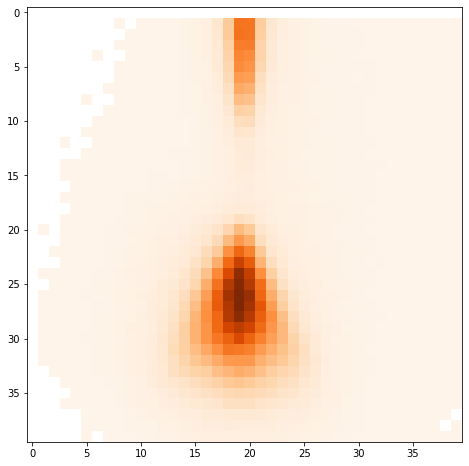

In [75]:
Oranges = cm.get_cmap('Oranges_r', 256)
newcolors = Oranges(np.linspace(1, 0, 256))
white = np.array([256/256, 256/256, 256/256, 1])
newcolors[:1, :] = white
newcmap = ListedColormap(newcolors, name='OrangeWhite')

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))


plt.imshow(np.average(jetimage_list[:,0], axis=0),vmin=0, 
#                            vmax=round(np.max(jetimage_average),3),
#                           vmax=0.5,
                          cmap=newcmap, 
                           origin='upper')

plt.show()

<a id="kinematics"></a>
# Quick Check Kinematics of Higgs candidates


[Back to the top](#TOP)

In [71]:
%%time

M_h = []
PT_h = []

for i in range(len(Higgs_candidate)):
    M_h.append([])
    PT_h.append([])

for N, process in enumerate(Higgs_candidate):
# for N, process in enumerate(process_list_clustered):
    for i, element in tqdm(enumerate(process)):
        if len(element) < 2:
            continue
        M_h[N].append(element.mass)
        PT_h[N].append(element.pt)
        
    if N % 2 == 0:
        proc = "H signal"
    elif N % 2 == 1:
        proc = "QCD bkg"

    logging.info("Process: {}, # of events:{}".format(proc,len(PT_h[N])))
    logging.info("\n")

68046it [00:00, 593526.67it/s]
INFO:root:Process: H signal, # of events:68046
INFO:root:

4770it [00:00, 595211.08it/s]
INFO:root:Process: QCD bkg, # of events:4770
INFO:root:



CPU times: user 135 ms, sys: 162 µs, total: 136 ms
Wall time: 131 ms


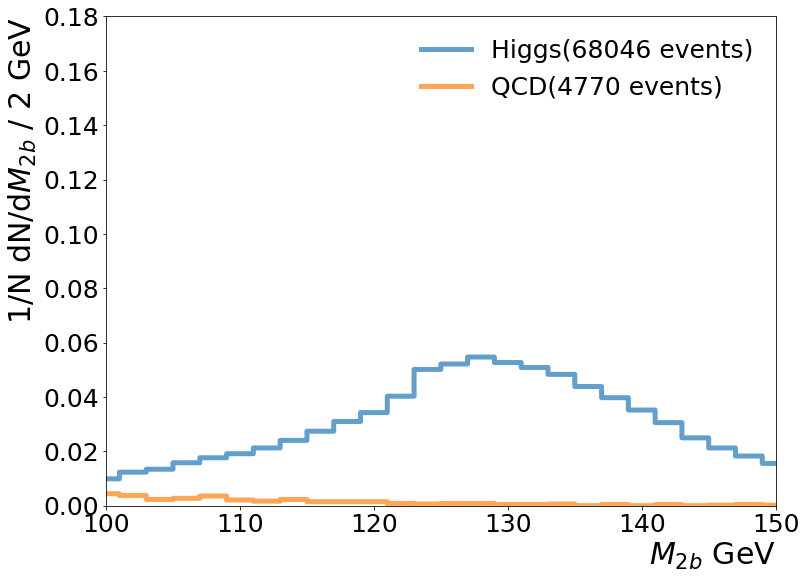

CPU times: user 203 ms, sys: 16 ms, total: 218 ms
Wall time: 214 ms


In [73]:
%%time

fig, ax = plt.subplots(1,1, figsize=(12,9))
length = np.linspace(0,2000,1001)

hist, bins = np.histogram(M_h[0], bins=length)
plt.step(bins[:-1], 
         hist.astype(np.float32) / hist.sum() ,
         where='mid',
         linewidth=5, 
         alpha=0.7,
         label="Higgs({} events)".format(len(M_h[0])))

hist, bins = np.histogram(M_h[1], bins=length)
plt.step(bins[:-1], 
         hist.astype(np.float32) / hist.sum() ,
         where='mid',
         linewidth=5, 
         alpha=0.7,
         label="QCD({} events)".format(len(M_h[1])))

ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
plt.xlim((100,150))
plt.xlabel("$M_{2b}$ GeV", fontsize=30,horizontalalignment='right',x=1) 

plt.legend(loc="upper right",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0)
    
plt.ylim((0., 0.18))
plt.ylabel("1/N dN/d$M_{2b}$ / 2 GeV", fontsize=30, horizontalalignment='right',y=1)
plt.show() 

<a id="jets_in_nth_event"></a>
## Print Jets in the Nth event

[Back to the top](#TOP)

In [60]:
index = 0
N = 0

for i, jets in enumerate(process_list_clustered[index][N]):
    print("{}".format("No." +str(i)+" Jet's Information"))
    print(jets)
    print("-------------------------------------------------------------------------")
    print("{:^19} {:^20} ".format("Constituent's PID","Constituent's Four Momentum"))
    print("-------------------------------------------------------------------------")
    
    for constituent in jets: # get constituent in each "jet_element"
        print("{:^19} {} {:^19} ".format(int(constituent.PID), constituent, int(constituent.Charge)))
    print("-------------------------------------------------------------------------")

No.0 Jet's Information
PseudoJet(pt=301.699, eta=1.733, phi=1.599, mass=109.924)
-------------------------------------------------------------------------
 Constituent's PID  Constituent's Four Momentum 
-------------------------------------------------------------------------
        211         PseudoJet(pt=0.274, eta=0.773, phi=1.506, mass=0.140)          1          
        211         PseudoJet(pt=0.286, eta=0.766, phi=1.546, mass=0.140)          1          
        22          PseudoJet(pt=0.026, eta=1.668, phi=0.643, mass=0.000)          0          
       -211         PseudoJet(pt=1.176, eta=1.737, phi=2.536, mass=0.140)         -1          
        22          PseudoJet(pt=0.457, eta=0.867, phi=1.316, mass=0.000)          0          
        22          PseudoJet(pt=0.245, eta=1.512, phi=2.432, mass=-0.000)          0          
        22          PseudoJet(pt=0.468, eta=0.949, phi=1.160, mass=0.000)          0          
       2112         PseudoJet(pt=1.246, eta=2.127, phi=2

<a id="truth_record"></a>
## Print the Truth Record in an Event


[Back to the top](#TOP)

In [62]:
# # GenParticle = GenParticle_ppwz
GenParticle = GenParticle_herwig_angular_H



print("There are {} information in this event.".format(len(GenParticle.Status[0])))
print("GenParticle Information")
print("{:^5}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^8}{:^8}{:^8}{:^8}".format("#","Status","PID", "M1", "M2", "D1", "D2", "PT", "Eta","Phi", "Mass"))

index = 4 ## which event you want to logging.info out
k = 0
for j in range(len(GenParticle.Status_At(index))):
    
#     if GenParticle.Status_At(index)[j] == 1: ##Selet the Stable Final State Particles
#         if np.abs(GenParticle.PID_At(index)[j]) == 12 or np.abs(GenParticle.PID_At(index)[j]) == 14:

#     if np.abs(GenParticle.PID_At(index)[GenParticle.M1_At(index)[j]]) == 24 or np.abs(GenParticle.PID_At(index)[GenParticle.M2_At(index)[j]]) == 24:
#         if np.abs(GenParticle.PID_At(index)[GenParticle.M1_At(index)[j]]) == 23 or np.abs(GenParticle.PID_At(index)[GenParticle.M2_At(index)[j]]) == 23:

        print("{:^5}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^8.2}{:^8.2}{:^8.2}{:^8.2}".format( \
        j, GenParticle.Status_At(index)[j],  GenParticle.PID_At(index)[j], GenParticle.M1_At(index)[j], GenParticle.M2_At(index)[j],
         GenParticle.D1_At(index)[j], GenParticle.D2_At(index)[j],  GenParticle.PT_At(index)[j],  GenParticle.Eta_At(index)[j], GenParticle.Phi_At(index)[j], GenParticle.Mass_At(index)[j]))

#             k +=1
# logging.info(k)

There are 795 information in this event.
GenParticle Information
  #  Status   PID    M1     M2     D1     D2      PT     Eta     Phi     Mass  
  0    11     25     16     69     10     10   3.2e+02   0.35    -2.0  1.2e+02 
  1    11     -1     16     69     11     11   3.2e+02   1.9     1.1     0.32  
  2     4    2212    -1     -1      3      5     0.0    1e+03    0.0     0.94  
  3    11     82      2     -1     13     13   7.1e-22  1e+03  -1.2e-16  0.85  
  4    11     -1      2     -1     14     15    0.055  1.1e+01   2.5   2.4e-05 
  5    11     21      2     -1     129    130  1.9e-15  1e+03    0.36  -7.2e-16
  6     4    2212    -1     -1      7      9     0.0    -1e+03   0.0     0.94  
  7    11     82      6     -1     12     12   1.8e-14  -1e+03   -3.1    0.93  
  8    11     21      6     -1     19     20     2.1     -7.5    1.0   -7.2e-05
  9    11     21      6     -1     154    155  1.8e-13  -1e+03  0.095  2.8e-05 
 10    11     25      0     -1     72     72   3.2e+02 

# JSS

In [124]:
# # import jet_trimming 
# # import JSS 
# from itertools import combinations


# def jet_trim(jet0, pt_cut= 0.03, R1 = 0.2):
#     # Define a cut threshold that the subjets have to meet (i.e. 3% of the original jet pT)
#     jet0_max = jet0.pt
#     jet0_cut = jet0_max*pt_cut

#     # Grab the subjets by clustering with R1
#     subjets = pyjet.cluster(jet0.constituents_array(), R=R1, p=1) # p = -1: anti-kt , 0: Cambridge-Aachen(C/A), 1: kt
#     subjet_array = subjets.inclusive_jets()
#     j0 = []
#     if (subjet_array[0].pt >= jet0_cut):
#         for ij, subjet in enumerate(subjet_array):
#             if subjet.pt < jet0_cut:
#                 # subjet doesn't meet the percentage cut on the original jet pT
#                 continue
#             if subjet.pt >= jet0_cut:
#                 # Get the subjets pt, eta, phi constituents
#                 subjet_data = subjet.constituents_array()
#                 j0.append(subjet_data)
#     else:
#         j0 = subjet_array[0].constituents_array()*0
#     jet = j0[0]
#     for i, subjet in enumerate(j0):
#         if i==0 :
#             continue
#         jet = np.append(jet, subjet)
        
#     sequence = pyjet.cluster(jet, R=1.2, p=-1)
#     jet = sequence.inclusive_jets()
#     return jet



# def CalcDeltaR(j1, j2):
#     eta1 = j1.eta
#     phi1 = j1.phi
#     eta2 = j2.eta
#     phi2 = j2.phi

#     dEta = eta1-eta2
#     dPhi = abs(phi1-phi2)
#     if dPhi > np.pi:
#         dPhi = 2*np.pi - dPhi

#     dR = (dPhi**2 + dEta**2)**0.5

#     return dR

# def CalcDeltaRArray(p, a):
#     dEta = p['eta'] - \
#         a['eta'].repeat(p.shape[0]).reshape(a.shape[0], p.shape[0])
#     dPhi = np.abs(p['phi'] - a['phi'].repeat(p.shape[0]
#                                              ).reshape(a.shape[0], p.shape[0]))
#     mask = dPhi > np.pi
#     dPhi[mask] *= -1
#     dPhi[mask] += 2 * np.pi
#     return (dPhi**2 + dEta**2)**0.5

# def t0(jet):
#     return sum(p.pt * CalcDeltaR(p, jet) for p in jet.constituents())

# def tn(jet, n): #t1 t2 t3 t21 t32
#     assert n >= 0
#     if n == 0:
#         return t0(jet)
#     particles = jet.constituents_array()
#     if len(particles) < n:
#         return -1
#     subjets = pyjet.cluster(particles, R=1.0, p=1).exclusive_jets(n)
#     subjets_array = [subjet.constituents_array() for subjet in subjets]
#     wta_axes = [a[np.argmax(a['pT'])] for a in subjets_array]
#     wta_axes = np.array(wta_axes, dtype=subjets_array[0].dtype)
#     return np.sum(particles['pT']*CalcDeltaRArray(particles, wta_axes).min(axis=0)) / t0(jet)

# def CalcEECorr(jet, n=1, beta=1.0):

#     assert n == 2 or n == 3, 'fn must be in [2, 3] but is n'

#     jet_particles = jet.constituents()

#     if len(jet_particles) < n:
#         return -1

#     currentSum = 0

#     if n == 2:
#         for p1, p2 in combinations(jet_particles, 2):
#             # get the terms of the triplet at hand
#             pt1 = p1.pt
#             pt2 = p2.pt
#             dr12 = CalcDeltaR(p1, p2)

#             # calculate the partial contribution
#             thisterm = pt1*pt2 * (dr12)**beta

#             # sum it up
#             currentSum += thisterm

#         eec = currentSum/(jet.pt)**2

#     elif n == 3:
#         dr = {(p1, p2): CalcDeltaR(p1, p2)
#               for p1, p2 in combinations(jet_particles, 2)}
#         for p1, p2, p3 in combinations(jet_particles, 3):
#             # get the terms of the triplet at hand
#             dr12 = dr[(p1, p2)]
#             dr13 = dr[(p1, p3)]
#             dr23 = dr[(p2, p3)]

#             # calculate the partial contribution
#             thisterm = p1.pt*p2.pt*p3.pt * (dr12*dr13*dr23)**beta

#             # sum it up
#             currentSum += thisterm

#         eec = currentSum/(jet.pt)**3
#     return eec

In [125]:
# ###################################################################################
  
# logging.info("Selection and Trimming")
# logging.info("\n")    
# logging.info(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
# ticks_1 = time.time()
    

# for i, element in enumerate(event_list_clustered):
#     for N in range(len(element)):

#         if len(element[N]) >= 2: # at least two jets in this event.
#             jet_1_untrimmed = element[N][0] #leading jet's information
#             jet_2_untrimmed = element[N][1] #subleading jet's information
        
#     #         if jet_1_untrimmed.pt < 300 or jet_1_untrimmed.pt > 500: 
#     #             continue

#             t1 = JSS.tn(jet_1_untrimmed, n=1)
#             t2 = JSS.tn(jet_1_untrimmed, n=2)
#             t21_untrimmed = t2 / t1 if t1 > 0.0 else 0.0

#             ee2 = JSS.CalcEECorr(jet_1_untrimmed, n=2, beta=1.0)
#             ee3 = JSS.CalcEECorr(jet_1_untrimmed, n=3, beta=1.0)
#             d21_untrimmed = ee3/(ee2**3) if ee2>0 else 0
#             d22_untrimmed = ee3**2/((ee2**2)**3) if ee2>0 else 0
#             c21_untrimmed = ee3/(ee2**2) if ee2>0 else 0
#             c22_untrimmed = ee3**2/((ee2**2)**2) if ee2>0 else 0 
            
#             M_J1[i].append(jet_1_untrimmed.mass)
#             PT_J1[i].append(jet_1_untrimmed.pt)
#             T21_1[i].append(t21_untrimmed)
#             D21_1[i].append(d21_untrimmed)
#             D22_1[i].append(d22_untrimmed)
#             C21_1[i].append(c21_untrimmed)
#             C22_1[i].append(c22_untrimmed)
            
            
#             t1 = JSS.tn(jet_2_untrimmed, n=1)
#             t2 = JSS.tn(jet_2_untrimmed, n=2)
#             t21_untrimmed = t2 / t1 if t1 > 0.0 else 0.0

#             ee2 = JSS.CalcEECorr(jet_2_untrimmed, n=2, beta=1.0)
#             ee3 = JSS.CalcEECorr(jet_2_untrimmed, n=3, beta=1.0)
#             d21_untrimmed = ee3/(ee2**3) if ee2>0 else 0
#             d22_untrimmed = ee3**2/((ee2**2)**3) if ee2>0 else 0
#             c21_untrimmed = ee3/(ee2**2) if ee2>0 else 0
#             c22_untrimmed = ee3**2/((ee2**2)**2) if ee2>0 else 0 
            
#             M_J2[i].append(jet_2_untrimmed.mass)
#             PT_J2[i].append(jet_2_untrimmed.pt)
#             T21_2[i].append(t21_untrimmed)
#             D21_2[i].append(d21_untrimmed)
#             D22_2[i].append(d22_untrimmed)
#             C21_2[i].append(c21_untrimmed)
#             C22_2[i].append(c22_untrimmed)
            
            

#             ## Jet Trimming
#             jet_1_trimmed = jet_trimming.jet_trim(jet_1_untrimmed)[0]   #trimming jet's information
#             jet_2_trimmed = jet_trimming.jet_trim(jet_2_untrimmed)[0]   #trimming jet's information

#     #         if jet_1_trimmed.pt < 300 or jet_1_trimmed.pt > 500: 
#     #             continue


#             t1 = JSS.tn(jet_1_trimmed, n=1)
#             t2 = JSS.tn(jet_1_trimmed, n=2)
#             t21_trimmed = t2 / t1 if t1 > 0.0 else 0.0

#             ee2 = JSS.CalcEECorr(jet_1_trimmed, n=2, beta=1.0)
#             ee3 = JSS.CalcEECorr(jet_1_trimmed, n=3, beta=1.0)
#             d21_trimmed = ee3/(ee2**3) if ee2>0 else 0
#             d22_trimmed = ee3**2/((ee2**2)**3) if ee2>0 else 0
#             c21_trimmed = ee3/(ee2**2) if ee2>0 else 0
#             c22_trimmed = ee3**2/((ee2**2)**2) if ee2>0 else 0 
            
#             M_J1_trimmed[i].append(jet_1_trimmed.mass)
#             PT_J1_trimmed[i].append(jet_1_trimmed.pt)
#             T21_1_trimmed[i].append(t21_trimmed)
#             D21_1_trimmed[i].append(d21_trimmed)
#             D22_1_trimmed[i].append(d22_trimmed)
#             C21_1_trimmed[i].append(c21_trimmed)
#             C22_1_trimmed[i].append(c22_trimmed)
            
            
#             t1 = JSS.tn(jet_2_trimmed, n=1)
#             t2 = JSS.tn(jet_2_trimmed, n=2)
#             t21_trimmed = t2 / t1 if t1 > 0.0 else 0.0

#             ee2 = JSS.CalcEECorr(jet_2_trimmed, n=2, beta=1.0)
#             ee3 = JSS.CalcEECorr(jet_2_trimmed, n=3, beta=1.0)
#             d21_trimmed = ee3/(ee2**3) if ee2>0 else 0
#             d22_trimmed = ee3**2/((ee2**2)**3) if ee2>0 else 0
#             c21_trimmed = ee3/(ee2**2) if ee2>0 else 0
#             c22_trimmed = ee3**2/((ee2**2)**2) if ee2>0 else 0 
            
#             M_J2_trimmed[i].append(jet_2_trimmed.mass)
#             PT_J2_trimmed[i].append(jet_2_trimmed.pt)
#             T21_2_trimmed[i].append(t21_trimmed)
#             D21_2_trimmed[i].append(d21_trimmed)
#             D22_2_trimmed[i].append(d22_trimmed)
#             C21_2_trimmed[i].append(c21_trimmed)
#             C22_2_trimmed[i].append(c22_trimmed)


# totaltime =  ticks_2 - ticks_1
# logging.info("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))


# ###################################################################################

In [126]:
# path2 = "/home/u5/Universality_DiHiggs/Data_High_Level_Features/"

# herwig_def_H = pd.read_csv(path2 + "herwig_ang_H_1.csv")
# herwig_def_QCD = pd.read_csv(path2 + "herwig_ang_QCD_1.csv")
# pythia_def_H = pd.read_csv(path2 + "pythia_def_H_1.csv")
# pythia_def_QCD = pd.read_csv(path2 + "pythia_def_QCD_1.csv")
# pythia_vin_H = pd.read_csv(path2 + "pythia_vin_H_1.csv")
# pythia_vin_QCD = pd.read_csv(path2 + "pythia_vin_QCD_1.csv")
# # pythia_dip = pd.read_csv(path2 + "pythia_dip_H_1.csv")
# # pythia_dip = pd.read_csv(path2 + "pythia_dip_QCD_1_untrimmed.csv")

# features = ["GEN","SHO","PRO",
#             "MJJ_0",
#             "MJ1_0","PTJ1_0","t211_0","D211_0","D221_0","C211_0","C221_0",
#             "MJ2_0","PTJ2_0","t212_0","D212_0","D222_0","C212_0","C222_0",
#             "MJJ",
#             "MJ1","PTJ1","t211","D211","D221","C211","C221",
#             "MJ2","PTJ2","t212","D212","D222","C212","C222",
#             "eventindex"
#            ]

In [127]:
# def Combine(feature):

#     feature_H = [herwig_def_H[feature],pythia_def_H[feature],pythia_vin_H[feature]]

#     feature_QCD = [herwig_def_QCD[feature],pythia_def_QCD[feature],pythia_vin_QCD[feature]]

#     H_QCD =  [herwig_def_H[feature],pythia_def_H[feature],pythia_vin_H[feature],
#               herwig_def_QCD[feature],pythia_def_QCD[feature],pythia_vin_QCD[feature]
#              ]
    
#     return feature_H, feature_QCD, H_QCD

In [128]:
# def HIST(process, length, title, colors, linestyle,xpo=1,ypo=1):
#     hist, bins = np.histogram(process, bins=length)
#     plt.step(bins[:-1], hist.astype(np.float32) / hist.sum(), linestyle ,color= colors ,where='mid',linewidth=5, alpha=0.7, label=title[i])
# #     plt.legend(bbox_to_anchor=(xpo, ypo),ncol=1,fontsize=30, edgecolor = "w",fancybox=False, framealpha=0)
#     plt.legend(loc="best",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0)
    
# # title = ["Herwig Angular", "Pythia default", "Pythia vincia", "Pythia dipole", "Sherpa", 
# #          "Herwig Angular QCD", "Pythia default QCD", "Pythia vincia QCD", "Pythia dipole QCD","Sherpa QCD"]
# # colors = ["green","red","darkred","blue","magenta",
# #           "cyan","orange","darkred","darkblue","darkgreen"]
# # linestyle = ["-","-.","--",":","X",
# #              "D","s","^","H","h","*"]
# # colors = ["green","red","darkred","blue","magenta"]
# # linestyle = ["-","-.","--",":","X"]

# title = ["Herwig angular (H->hh)","Pythia default (H->hh)","Pythia vincia (H->hh)",#"Pythia dipole (H->hh)",
#          "Herwig angular(QCD)", "Pythia default(QCD)", "Pythia vincia(QCD)" #, "Pythia dipole(QCD)"
#         ]
# colors = ["green","red","blue",#"purple",
#           "cyan","black","Orange"#,"lightblue"
#          ]


# linestyle = ["-","-.",":",#"--",
#              "--","--",":"#,":"
#             ]



In [ ]:
# Mjj= Combine("MJ1_0")[0]

# fig, ax = plt.subplots(1,1, figsize=(12,9))
# for i, process in enumerate(Mjj):
#     length = np.linspace(0,1000,201)
#     HIST(process, length, title,colors[i],linestyle[i])
#     ax.tick_params(axis='x', labelsize=25)
#     ax.tick_params(axis='y', labelsize=25)
#     plt.xlim((0,200))
#     plt.xlabel("$M_{J}$ GeV", fontsize=30,horizontalalignment='right',x=1) 

    
# plt.ylim((0.))
# plt.ylabel("1/N dN/d$M_{J}$ / 5 GeV", fontsize=30, horizontalalignment='right',y=1)
# # plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
# plt.show()  

In [ ]:
# Mjj= Combine("MJJ_0")[2]

# fig, ax = plt.subplots(1,1, figsize=(12,9))
# for i, process in enumerate(Mjj):
#     length = np.linspace(0,1000,201)
#     HIST(process, length, title,colors[i],linestyle[i])
#     ax.tick_params(axis='x', labelsize=25)
#     ax.tick_params(axis='y', labelsize=25)
#     plt.xlim((0,1000))
#     plt.xlabel("$M_{JJ}$ GeV", fontsize=30,horizontalalignment='right',x=1) 

    
# plt.ylim((0.))
# plt.ylabel("1/N dN/d$M_{JJ}$ / 5 GeV", fontsize=30, horizontalalignment='right',y=1)
# # plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
# plt.show()  

In [ ]:
# M_j = Combine("MJ1_0")[2]


# fig, ax = plt.subplots(1,1, figsize=(12,9))
# for i, process in enumerate(M_j):
#     length = np.linspace(0,200,101)
#     HIST(process, length, title,colors[i],linestyle[i])
#     ax.tick_params(axis='x', labelsize=25)
#     ax.tick_params(axis='y', labelsize=25)
#     plt.xlim((0,200))
#     plt.xlabel("$M_{J}$ GeV", fontsize=30,horizontalalignment='right',x=1) 

    
# plt.ylim((0.))
# plt.ylabel("1/N dN/d$M_{J}$ / 2 GeV", fontsize=30, horizontalalignment='right',y=1)
# # plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
# plt.show()  

In [ ]:
# PT_j =  Combine("MJ2")[1]

# fig, ax = plt.subplots(1,1, figsize=(12,9))
# for i, process in enumerate(PT_j):
#     length = np.linspace(0,1000,101)
#     HIST(process, length, title,colors[i],linestyle[i])
#     ax.tick_params(axis='x', labelsize=25)
#     ax.tick_params(axis='y', labelsize=25)
#     plt.xlim((0,200))
#     plt.xlabel("$PT_{J}$ GeV", fontsize=30,horizontalalignment='right',x=1) 

    
# plt.ylim((0.))
# plt.ylabel("1/N dN/d$PT_{J}$ / 10 GeV", fontsize=30, horizontalalignment='right',y=1)
# # plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
# plt.show() 

In [ ]:
# T21 = Combine("t212")[2]

# fig, ax = plt.subplots(1,1, figsize=(12,9))
# for i, process in enumerate(T21):
#     length = np.linspace(0,100,501)
#     HIST(process, length, title,colors[i],linestyle[i])
#     ax.tick_params(axis='x', labelsize=25)
#     ax.tick_params(axis='y', labelsize=25)
#     plt.xlim((0,2))
#     plt.xlabel("$t_{21}$", fontsize=30,horizontalalignment='right',x=1) 

    
# plt.ylim((0.))
# plt.ylabel("1/N dN/d$t_{21}$ / 0.02 ", fontsize=30, horizontalalignment='right',y=1)
# # plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
# plt.show()  